<a href="https://colab.research.google.com/github/bele99/Project/blob/main/Forecasting_Timeseries_STL_ARIMA_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Content


2. Part 2

  [Data Preprocessing](#cell_Preprocessing)

  [Answer 2.1](#cell_Answer_2.1)

  [Answer 2.2](#cell_Answer_2.2)

    a. [Answer 2.2.1](#cell_Answer_2.2.1)

    b. [Answer 2.2.2](#cell_Answer_2.2.2)

    c. [Answer 2.2.3](#cell_Answer_2.2.3)

  [Comparison of experimental results](#cell_Comparison)

  [Conclusion](#cell_Conclusion)



<a id = "cell_Preparation"></a>
# Part 1

......

#Part 2

In [ ]:
def sum_digits(n):
  r = 0
  while n:
    r, n = r +n % 10, n//10
  return r

def check_studentid(studentid_list):
  studentid = sum(studentid_list)
  x = sum_digits(studentid)
  if x % 2 == 0:
    print('Version II')
  else:
    print('Version I')

check_studentid([....,....,....])

Version I


In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=d99d603b19471ffaab2a25bc64a4870c2042fbb3b2da807325d652bcfa3306e1
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import acf
import datetime
from sklearn.metrics import mean_squared_error
import statistics
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns 

<a id = "cell_Preprocessing"></a>
##Data Preprocessing

In [ ]:
import wget

link_aus_ds = 'https://raw.githubusercontent.com/tulip-lab/open-data/master/HK2012-2018/Australia.csv'
DataSet = wget.download(link_aus_ds)

In [ ]:
# Data Preprocessing
australia_dataset = pd.read_csv('Australia.csv')

In [ ]:
australia_dataset['date'] = pd.to_datetime(australia_dataset['date'], format='%Y-%m-%d')
australia_dataset.head()

,date,arrival,Hong kong,Hong kong dollar,Sheung Wan,Tai Ping Shan Street,Hong kong central,Hong Kong Disneyland,hong kong dollar to rmb,hkd to usd,...,bus hong kong,taxi hong kong,holiday hong kong,festival hong kong,hot hong kong,temperature hong kong,bar hong kong,air asia Hong Kong,Yum cha,Hong Kong Convention and Exhibition Centre
0,2012-01-01,60116,94,63,13,89,71,100,89,10,...,56,30,100,17,81,94,52,87,89,40
1,2012-02-01,43982,90,53,26,75,40,79,75,10,...,24,20,65,26,67,89,44,51,75,40
2,2012-03-01,57736,97,49,12,79,31,80,79,5,...,52,45,59,48,75,46,48,28,79,0
3,2012-04-01,58640,87,59,51,89,33,72,89,13,...,40,10,63,50,39,72,78,74,89,0
4,2012-05-01,46312,81,49,57,95,38,72,95,11,...,45,86,47,38,35,39,59,66,95,0


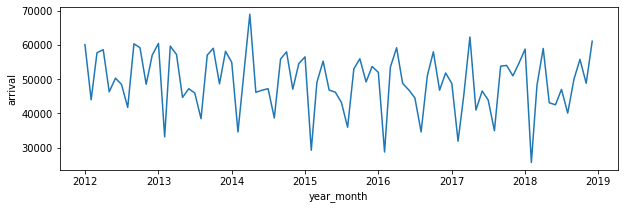

In [ ]:
# Display data by month
australia_dataset['year_month'] = australia_dataset['date'].dt.to_period('M')

df_year_month = pd.DataFrame(australia_dataset.groupby(['year_month'])['arrival'].agg('sum'),columns=['arrival'])

plt.rcParams["figure.figsize"] = (10,3)
sns.lineplot(df_year_month.index.to_timestamp(),df_year_month.arrival)

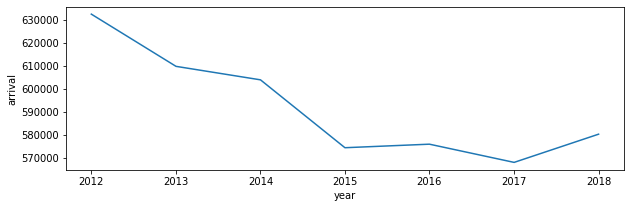

In [ ]:
# Show the data by year
australia_dataset['year'] = australia_dataset['date'].dt.to_period('Y')
df_year = pd.DataFrame(australia_dataset.groupby(['year'])['arrival'].agg('sum'),columns=['arrival'])

plt.rcParams["figure.figsize"] = (10,3)
sns.lineplot(df_year.index.to_timestamp(),df_year.arrival)

In [ ]:
# Index the dataset with time
australia_dataset.index = australia_dataset['date']

<a id = "cell_Answer_2.1"></a>
## **Answer 2.1**

In [ ]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

australia_dataset = australia_dataset[['arrival']]
# Additive Decomposition
seasonal_result = seasonal_decompose(australia_dataset['arrival'], model='additive')

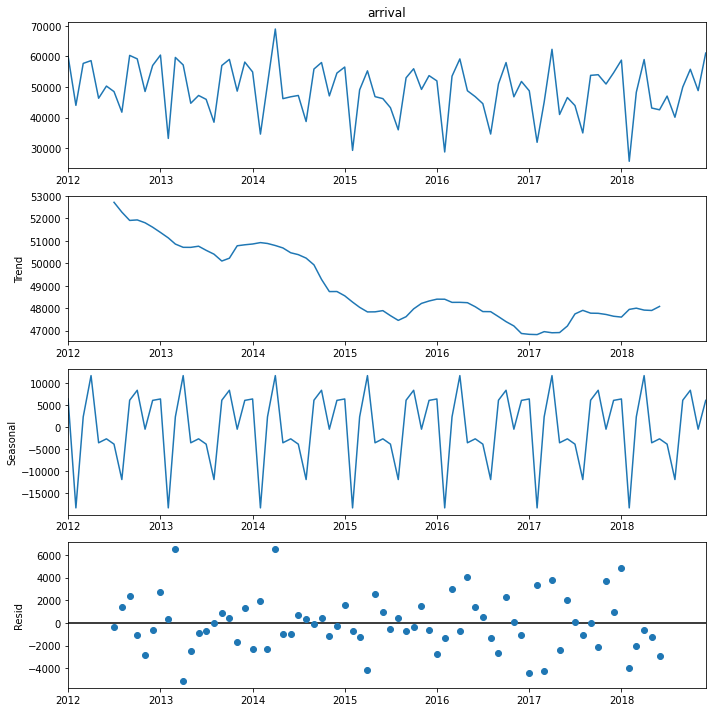

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
seasonal_result.plot()
plt.show()

**The subgraph of Trend**:

It can be observed from the trend chart that the number of "arrival" gradually decreases with time.

**The subgraph of Seasonal**:

As shown above, it can be seen in the Seasonal subgraph that there is a repeated pattern with regular intervals every year from 2012 to 2018. For example, the model from 2012 to 2013 is similar to that from 2013 to 2014. It means that the number of tourists reaches its peak every spring. With the arrival of summer, the number of tourists decreases rapidly, and the number of tourists in autumn and winter ushers in two mountains.

### STL with moving average

In [ ]:
def moving_average(series, n=1):
  # walk forward over time steps in test
  mov_av = sum(series[-n:])/(n)

  return mov_av
  

In [ ]:
def compute_rmse(y_true, y_pred):
  # evaluate forecasts
  rmse = sqrt(mean_squared_error(y_true, y_pred))
  
  return rmse

In [ ]:
# Collect results for conclusion comparison
result_rmse = pd.DataFrame()
def disp_rmse(rmse_value,model_name):
  dict_re = {'model_name': model_name, 'RMSE':round(rmse_value,3)} 
  pd_rmse = pd.DataFrame([dict_re])

  # Combine RMSE values for all models
  re =  pd.concat([result_rmse, pd_rmse], ignore_index = True)

  return re

**Modelling**

In [ ]:
def forecast(data, ma_func, steps=10,  windows=1):
    # container for forecast values
    forecast_array = np.array([])

    # forecast the trend value
    trend_array = train_data.dropna()

    data_hist = trend_array.values.reshape(-1,).tolist()

    for i in range(steps):
      pred_val = moving_average(data_hist, windows)
      data_hist.append(pred_val)

    # Select six predicted values after predicting training data (step = 6)
    forecast_array = data_hist[-steps:] #pred[0:steps]
    col_name = ma_func.__name__
    
    # Observed data are used to generate the forecast start and index.
    observed_timedelta = trend_array.index[-1] - trend_array.index[-2]

    # Set the datetime for predict value 
    forecast_idx_start = trend_array.index[-1] + observed_timedelta + datetime.timedelta(days=2)
    forecast_idx = pd.date_range(start=forecast_idx_start, 
                                 periods=steps,
                                 freq=pd.tseries.frequencies.to_offset(observed_timedelta))

    forecast_array = np.reshape(forecast_array,(-1,1))

    # the data array and index should be used to generate a named forecast frame.
    forecast_frame = pd.DataFrame(data=forecast_array, index=forecast_idx)
    forecast_frame.columns = [col_name]  

    return forecast_frame

**Evaluate and Predict**

In [ ]:
# Get the trend data
decompose_tend_data = pd.DataFrame(seasonal_result.trend)

# split the data set
train_data = decompose_tend_data[decompose_tend_data.index <= '2017-12-31']
test_data = decompose_tend_data[decompose_tend_data.index >= '2017-12-31']

# Use the prediction function to predict the last six values of training data, and the average number of moving steps is 1.
fcast01 = forecast(train_data, steps=6, windows=1, ma_func=moving_average)
fcast02 = forecast(train_data, steps=6, windows=2, ma_func=moving_average)
fcast04 = forecast(train_data, steps=6, windows=4, ma_func=moving_average)
fcast05 = forecast(train_data, steps=6, windows=5, ma_func=moving_average)
fcast12 = forecast(train_data, steps=6, windows=12, ma_func=moving_average)

# RMSE is obtained by calculating the predicted value and the real value of the australia_dataset data set
rmse_result = compute_rmse(australia_dataset[-12:-6],fcast01.moving_average)
result_rmse = disp_rmse(rmse_result,'STL_MA')  # For all model performance comparisons
print(result_rmse)

  model_name       RMSE
0     STL_MA  11434.565


In [ ]:
observed = seasonal_result.observed
observed = observed[observed.index<='2017-12-01']
# Display real value, trend value and predicted trend value
def plot_compare_ma(start_idx, end_idx, ylim):
  fig_data_size = plt.rcParams["figure.figsize"]
  plt.rcParams["figure.figsize"] = [10, 5]
  # Four different values
  plt.plot(australia_dataset, '--', label='truth')
  plt.plot(observed, '--', label='decomp_data')
  plt.plot(train_data, ':', label='train_trend')

  ps = [fcast01,fcast02,fcast04,fcast05,fcast12]
  ns = [1,2,4,5,12]
  for i, p in enumerate(ps):
    # The RMSE results here are calculated with real trend data and predicted trend data to find the best window number.
    plt.plot(p, '-', label=f'trend-pred n={ns[i]} RMSE={compute_rmse(test_data[0:6], p):.2f}')

  plt.title('STL  decomposition forecast with moving_average from 2018-01 to 2018-06')
  plt.xlabel('Date')
  plt.ylabel('Arrival')
  plt.xlim([pd.to_datetime(start_idx, format = '%Y-%m-%d'),
             pd.to_datetime(end_idx, format = '%Y-%m-%d')])
  plt.ylim(ylim)
  plt.legend()

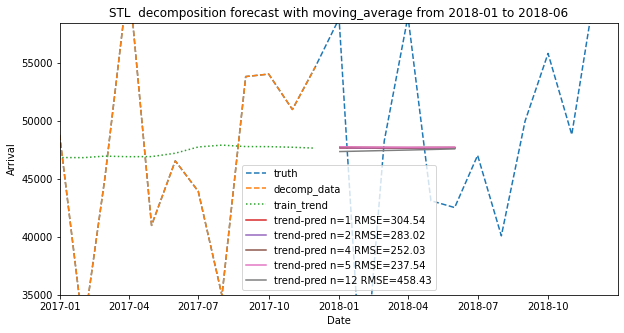

In [ ]:
plot_compare_ma(start_idx='2017-01-01', end_idx='2018-12-31', ylim=(35000,58430))

**Conclusion summary of question 2.1**:

The ”arrivals“ of the Australian dataset are displayed using the STL decomposition function. From the trend subgraph, we can see that the number of arrivals decreases with time. In the seasonal chart, we can see that there is a repeated model with regular intervals every year from 2012 to 2018. The difference between the actual value and the predicted value can be seen in the residual diagram. The points are randomly scattered around the 0 lines in this residual diagram. We can conclude that the linear model is suitable for modelling these data.

As shown in the figure "STL decomposition forecast with moving_average from 2018-01 to 2018-06", we used STL trend data and moving_average function shifts by 1,2,4,5,12 steps to predict the trend value from January 2018 to June 2018.

In the model, we use the moving average function with windows 1, 2, 4, 5, and 12 to find the number of windows with the best performance is 5 (RMSE=237.54). As the question needs to be solved in one step(windows=1), the RMSE of all models is 11434.565, calculated from the prediction result and the original data.

<a id = "cell_Answer_2.2"></a>
##**Answer 2.2**

**Check data**

In [ ]:
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

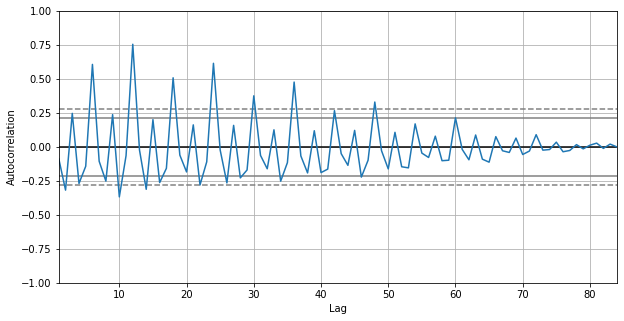

In [ ]:
# Using autocorrelation to detect the seasonality of time series
# Draw a sequence and check for repeatable patterns at regular intervals
autocorrelation_plot(australia_dataset.arrival)
plt.show()

**Stationaity test**

Test whether the time series is stable. The null hypothesis is that the time series is non-stationary. If the P value is less than 5%, we will deny the original hypothesis and believe that the series is stable. Otherwise, we think the initial hypothesis is true.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(australia_dataset.arrival.dropna())
print('ADF(Augmented Dickey Fuller test) Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF(Augmented Dickey Fuller test) Statistic: -2.482663
p-value: 0.119750


We used the Augmented Dickey Fuller test (ADF test) from the statmodels package to check whether the series is still. The reason is that we need to take the derivative only when the series is non-stationary. Otherwise, the result is not required, that is, d=0.

The null hypothesis (H0) of the ADF test is that the time series is non-stationary. Therefore, if the p-value of the test is less than the significance level (0.05), we reject the original hypothesis and infer that the time series is indeed stable.

The conclusion shows that the data set is non-stationary

<a id = "cell_Answer_2.2.1"></a>
###**a. Answer 2.2.1**

**Determine the different order of ARIMA model (d)**

The correct difference order is the minimum difference needed to obtain a nearly stable series. As shown in the figure below,

In this case, the time series did not reach equilibrium in all orders for the series. The following three autocorrelation sub-graphs show that a lot of data has entered the negative value area. This indicates that the series may have been too poor. Therefore, we try to set d to 0.

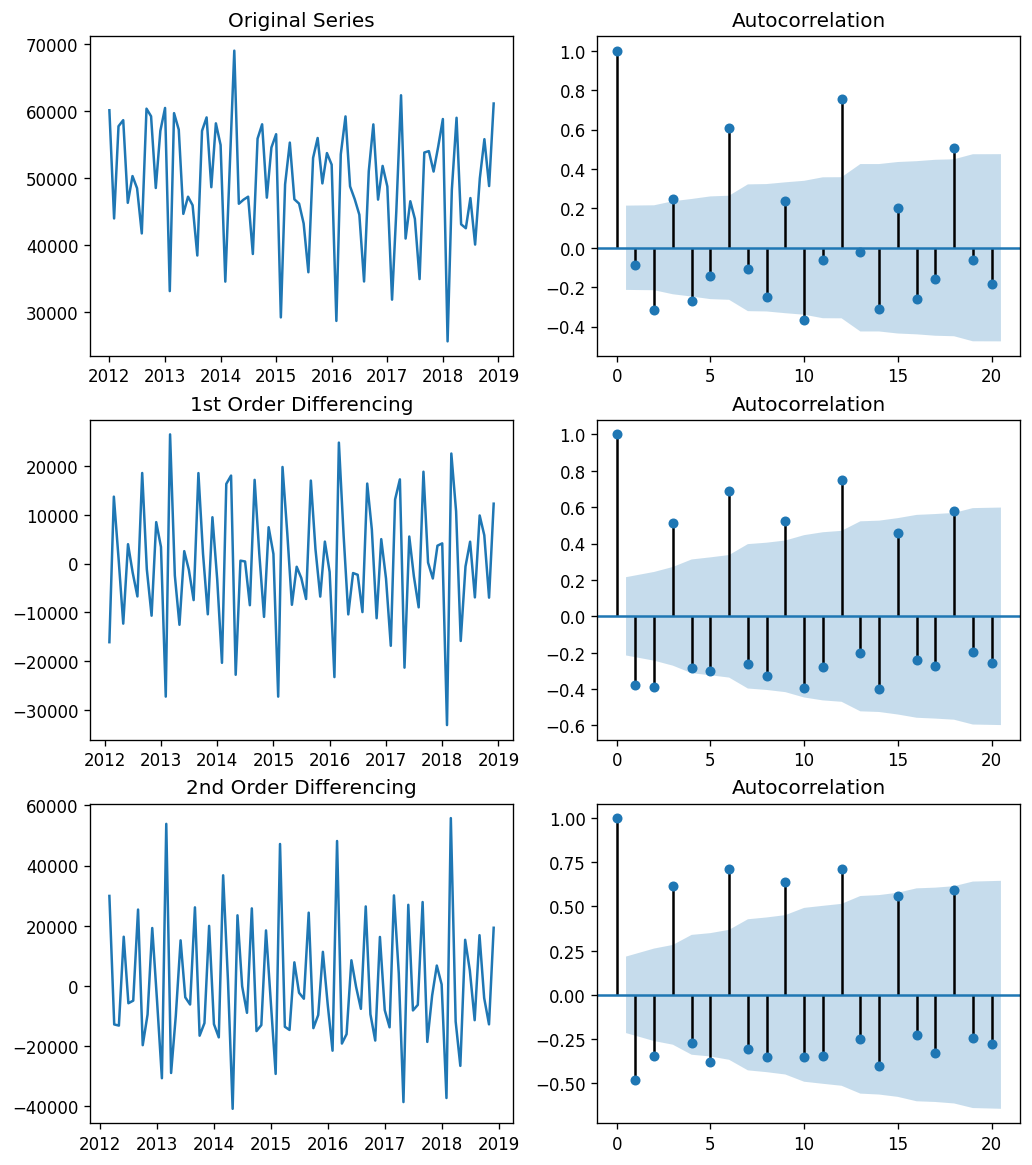

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(10,12), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2)

axes[0, 0].plot(australia_dataset.arrival); 
axes[0, 0].set_title('Original Series')
plot_acf(australia_dataset.arrival, ax=axes[0, 1])


# 1st Differencing
axes[1, 0].plot(australia_dataset.arrival.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(australia_dataset.arrival.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(australia_dataset.arrival.diff().diff()); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(australia_dataset.arrival.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

**Autocorrelation and Partial Autocorrelation**

**Try to find the order of AR terms (p)**

We use partial autocorrelation (PACF) graphs to find the number of AR items required. Within 13 delays, AR is essential. So we set p to 10.

**Try to find MA item (q)**

For example, in the autocorrelation graph of the different grading numbers of subgraphs, we can see the number of MA terms in the ACF graph, which is the error of lag prediction. The hysteresis of 3, 6, 9 and 12 is positive and far higher than the significance line. we set q is 1.

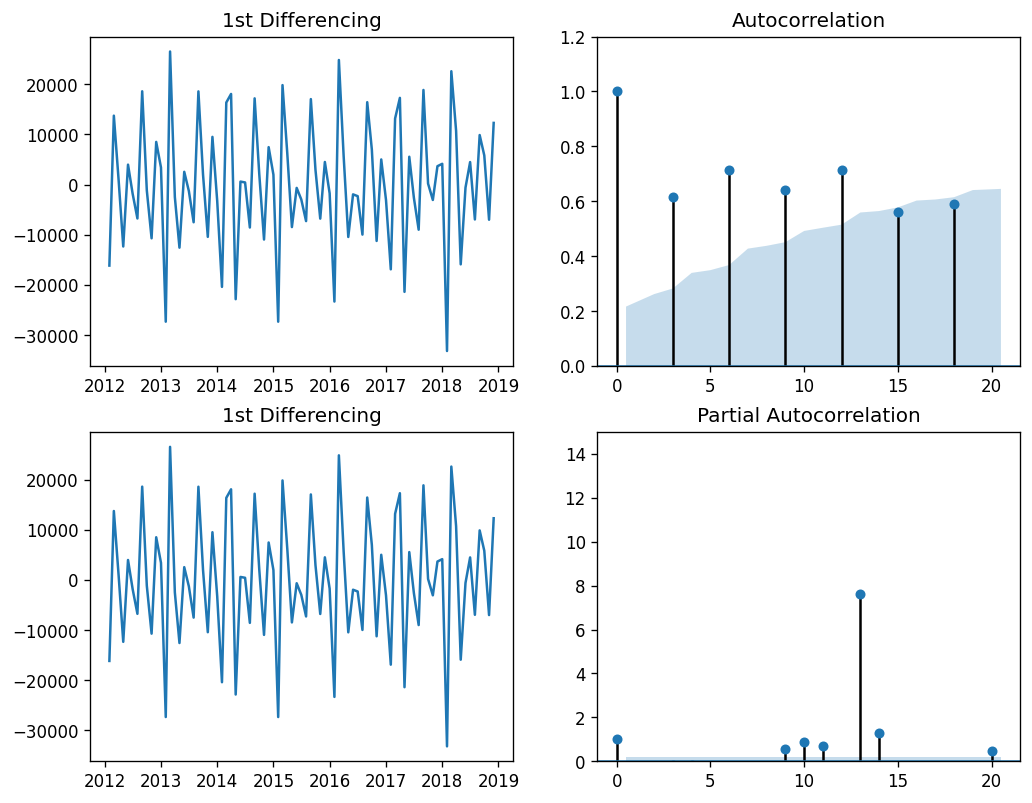

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2)
axes[0,0].plot(australia_dataset.arrival.diff())
axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,1.2))

plot_acf(australia_dataset.arrival.diff().diff().dropna(), ax=axes[0,1])

# To determine the P value
axes[1,0].plot(australia_dataset.arrival.diff())
axes[1,0].set_title('1st Differencing')
axes[1,1].set(ylim=(0,15))
plot_pacf(australia_dataset.arrival.diff().diff().dropna(), ax=axes[1,1])

plt.show()

We can see that the lag of PACF 13 is quite significant because it is much higher than the significance line. Let's set the value of p to 10.

**Modelling**

In [ ]:
train_data = australia_dataset[australia_dataset.index <= '2017-12-31'].copy()
test_data = australia_dataset[australia_dataset.index >= '2017-12-31'].copy()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Build a model
model_foreca = ARIMA(train_data.arrival, order=(10,0,1))
# Model fit
model_foreca_fit = model_foreca.fit(disp=-1)
print(model_foreca_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                arrival   No. Observations:                   72
Model:                    ARMA(10, 1)   Log Likelihood                -722.120
Method:                       css-mle   S.D. of innovations           5306.024
Date:                Fri, 23 Sep 2022   AIC                           1470.240
Time:                        09:54:20   BIC                           1499.837
Sample:                    01-01-2012   HQIC                          1482.023
                         - 12-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            4.95e+04    675.980     73.221      0.000    4.82e+04    5.08e+04
ar.L1.arrival     -0.0007      0.181     -0.004      0.997      -0.355       0.354
ar.L2.arrival     -0.2565      0.114

**Evaluate and Predict**

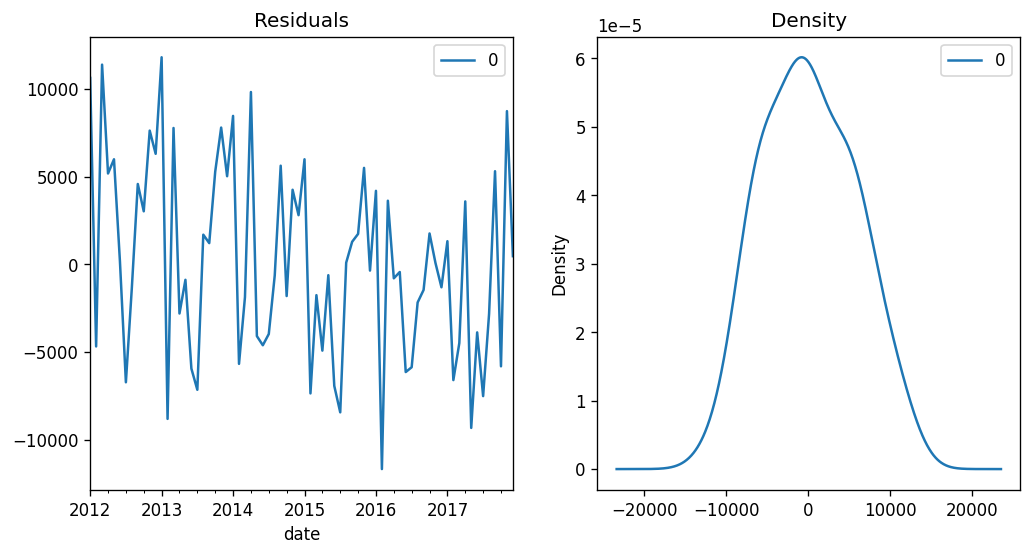

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_foreca_fit.resid)
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})

fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Residual error: residual error seems to fluctuate within the range of 0 mean value, and the variance is uniform.

Density figure: the density map shows a good normal distribution

Let's use plot_ Predict () plots the relationship between the actual and fitted values.

In [ ]:
predict_fc, sear, confiden_vl = model_foreca_fit.forecast(12, alpha=0.05)

In [ ]:
# Accuracy metrics
def calculate_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'mae': mae, 'rmse':rmse})

arima_result = calculate_accuracy(predict_fc, test_data.arrival)

In [ ]:
for key, values in arima_result.items():
  print('{} : {}'.format(key, round(values,3)))

mape : 0.12
mae : 5114.308
rmse : 6432.786


In [ ]:
result_rmse = disp_rmse(arima_result['rmse'],'ARIMA_Model')

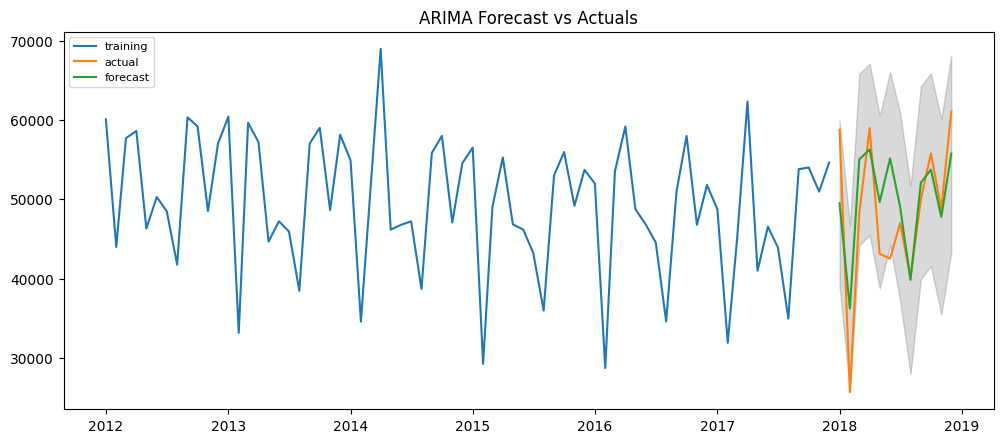

In [ ]:
# Make as pandas series
fc_series = pd.Series(predict_fc, index=pd.to_datetime(test_data.index, format="%Y-%m-%d"))

lower_series = pd.Series(confiden_vl[:, 0], index=pd.to_datetime(test_data.index, format="%Y-%m-%d"))
upper_series = pd.Series(confiden_vl[:, 1], index=pd.to_datetime(test_data.index, format="%Y-%m-%d"))

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data.arrival, label='training')
plt.plot(test_data.arrival, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.title('ARIMA Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
plt.close()

**Answer 2.2.1:**

This section uses ACP, PACF and difference order to determine the p, d and q required by the ARIMA model, respectively 10, 0 and 1. Then ARIMA model is built, and the prediction results (see Fig. ARIMA Forecast vs Actuals) and RMSE value are 6432.786. The residual graph of the model shows that the residual seems to fluctuate within the range of the mean value of 0, and the variance is uniform. The density map indicates it shows that the data is normally distributed.

<a id = "cell_Answer_2.2.2"></a>
###**b. Answer 2.2.2**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Use a walk-forward validation to assess an ARIMA model.
X = train_data.arrival 
history = [x for x in train_data.arrival]
predictions = list()
RSME = []
p=[1,2,3]
q=[1,2,3]
d=[1,2,3]

# walk-forward validation
for i1 in p:
  for i2 in q:
    for i3 in d:
      flg=1
      predictions = list()
      try:
          model = ARIMA(history, order=(i1,i3,i2))
          model_fit = model.fit(disp=-1)
          output = model_fit.forecast(12,alpha=0.05)
          predictions = output[0]
      except:
          flg=0
          pass
 
      if flg == 1:
        rmse = compute_rmse(test_data.arrival, predictions)

        RSME.append(rmse)
        print('Test RMSE: %.3f' % rmse,i1,i3,i2)   

Test RMSE: 9974.988 1 1 1
Test RMSE: 9713.886 1 1 2
Test RMSE: 9452.048 1 2 2
Test RMSE: 10115.289 1 1 3
Test RMSE: 9702.634 2 1 1
Test RMSE: 12163.983 2 2 1
Test RMSE: 9667.705 2 1 2
Test RMSE: 11849.113 2 2 2
Test RMSE: 8950.149 2 2 3
Test RMSE: 12175.801 3 2 1
Test RMSE: 9628.319 3 1 2
Test RMSE: 11852.687 3 2 2
Test RMSE: 8070.450 3 2 3


**Modelling**

In [ ]:
grid_model = ARIMA(train_data.arrival, order=(3,2,3))
# Model fit
grid_model_fit = grid_model.fit(disp=-1)
print(grid_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D2.arrival   No. Observations:                   70
Model:                 ARIMA(3, 2, 3)   Log Likelihood                -724.872
Method:                       css-mle   S.D. of innovations           6932.892
Date:                Fri, 23 Sep 2022   AIC                           1465.744
Time:                        09:54:42   BIC                           1483.732
Sample:                    03-01-2012   HQIC                          1472.889
                         - 12-01-2017                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.4750     35.764     -0.293      0.770     -80.571      59.621
ar.L1.D2.arrival    -1.1829      0.145     -8.175      0.000      -1.467      -0.899
ar.L2.D2.arrival    -1.1811 

**Evaluate and Predict**

In [ ]:
pred_grid, sear_grid, conf_grid = grid_model_fit.forecast(6, alpha=0.05)

In [ ]:
actual_y = test_data.arrival
rmse_grid = compute_rmse(actual_y[0:6], pred_grid)
print('Test RMSE: %.3f' % rmse_grid)

Test RMSE: 9031.560


In [ ]:
result_rmse = disp_rmse(rmse_grid,'Grid_ARIMA_Model')

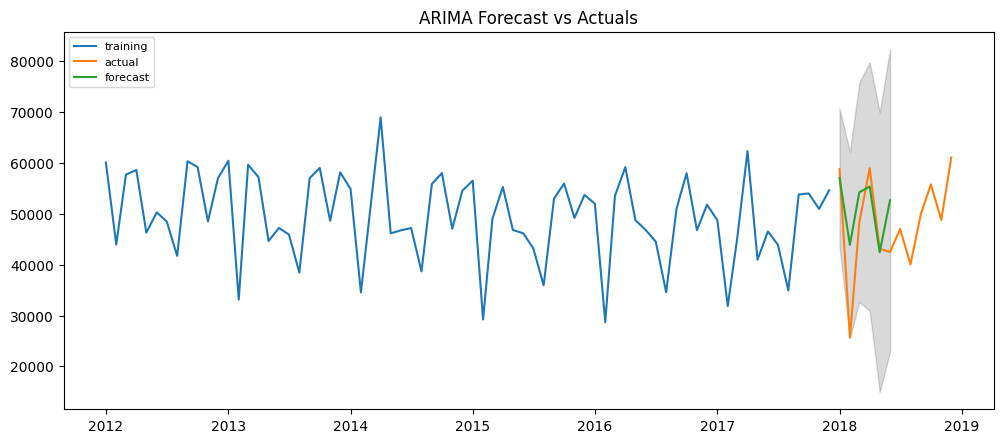

In [ ]:
# Make as pandas series
fc_series = pd.Series(pred_grid, index=pd.to_datetime(test_data.index[0:6], format="%Y-%m-%d"))

lower_series = pd.Series(conf_grid[:, 0], index=pd.to_datetime(test_data.index[0:6], format="%Y-%m-%d"))
upper_series = pd.Series(conf_grid[:, 1], index=pd.to_datetime(test_data.index[0:6], format="%Y-%m-%d"))

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data.arrival, label='training')
plt.plot(test_data.arrival, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.title('ARIMA Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
plt.close()

**Answer 2.2.2:**

Assuming that the range of all p, d, and q parameters is 1 to 3, we will try a grid search on these three parameters and get the best p, d, and q parameters of 3, 2, and 3, respectively. Using the ARIMA model, we get the prediction result graph and RMSE value of 9031.560 (see figure. ARIMA Forecast vs Actuals).

<a id = "cell_Answer_2.2.3"></a>
###**c. Answer 2.2.3**

In [ ]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, GRU, Embedding, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, SGD, Adadelta
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.backend import square, mean
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.layers import Dropout
from keras import layers

In [ ]:
# Standardize data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data) 

In [ ]:
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train_data.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) 
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

**Modelling**

In [ ]:
def model_gru_bid(num_x_shape, num_y_shape):
  model = Sequential()

  # Adding the first GRU layer 
  model.add(layers.Bidirectional(GRU(units = 256, return_sequences = True), input_shape = (X_train.shape[1], 1)))
  # Dropout regularisation for tackling overfitting
  model.add(Dropout(0.2))

  model.add(layers.Bidirectional(GRU(units = 128, return_sequences = True)))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(layers.Bidirectional(GRU(units = 32, return_sequences = True)))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(GRU(units = 50))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  
  # Adding the output layer
  model.add(Dense(units = 1, activation='linear'))
  model.summary()
  return model

In [ ]:
# The optimizer is defined
opt_adam = Adam(learning_rate=0.005, beta_1=0.85, beta_2=0.999, epsilon=1e-07)

# Model training
model_gru = model_gru_bid(X_train.shape[1], 1)

# compile
model_gru.compile(loss='mean_squared_error', optimizer=opt_adam, metrics=[metrics.mae])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 7, 512)           397824    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 7, 512)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 7, 256)           493056    
 nal)                                                            
                                                                 
 batch_normalization (BatchN  (None, 7, 256)           1024      
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 7, 256)            0         
                                                        

In [ ]:
# the procedure used to take a snapshot of the system's condition when it is broken.
cback_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)

In [ ]:
model_gru_history = model_gru.fit(X_train, y_train,
        epochs=200,
        batch_size=16,
        callbacks=cback_stop,
        verbose=2
        )

Epoch 1/200
5/5 - 16s - loss: 3.1322 - mean_absolute_error: 1.3577 - 16s/epoch - 3s/step
Epoch 2/200
5/5 - 0s - loss: 1.2490 - mean_absolute_error: 0.8574 - 300ms/epoch - 60ms/step
Epoch 3/200
5/5 - 0s - loss: 1.3138 - mean_absolute_error: 0.8898 - 339ms/epoch - 68ms/step
Epoch 4/200
5/5 - 0s - loss: 0.9919 - mean_absolute_error: 0.7662 - 307ms/epoch - 61ms/step
Epoch 5/200
5/5 - 0s - loss: 0.8353 - mean_absolute_error: 0.7436 - 305ms/epoch - 61ms/step
Epoch 6/200
5/5 - 0s - loss: 0.9960 - mean_absolute_error: 0.7206 - 325ms/epoch - 65ms/step
Epoch 7/200
5/5 - 0s - loss: 0.8225 - mean_absolute_error: 0.7194 - 300ms/epoch - 60ms/step
Epoch 8/200
5/5 - 0s - loss: 0.7000 - mean_absolute_error: 0.6651 - 307ms/epoch - 61ms/step
Epoch 9/200
5/5 - 0s - loss: 0.5246 - mean_absolute_error: 0.5587 - 300ms/epoch - 60ms/step
Epoch 10/200
5/5 - 0s - loss: 0.4936 - mean_absolute_error: 0.5901 - 319ms/epoch - 64ms/step
Epoch 11/200
5/5 - 0s - loss: 0.4544 - mean_absolute_error: 0.4940 - 312ms/epoch -

**Evaluate and Predict**

In [ ]:
test_date_true_y = test_data.iloc[:,0:1].values

In [ ]:
com_data = pd.concat((train_data['arrival'], test_data['arrival']), axis = 0)
input_test_data = com_data[len(com_data) - len(test_data) - timesteps:].values
input_test_data = input_test_data.reshape(-1,1)
input_test_data = scaler.transform(input_test_data)

In [ ]:
# the same procedures we used while preparing data for training
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(input_test_data[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_predicted = model_gru.predict(X_test)
# inverse_transform
y_predicted_finial = scaler.inverse_transform(y_predicted)

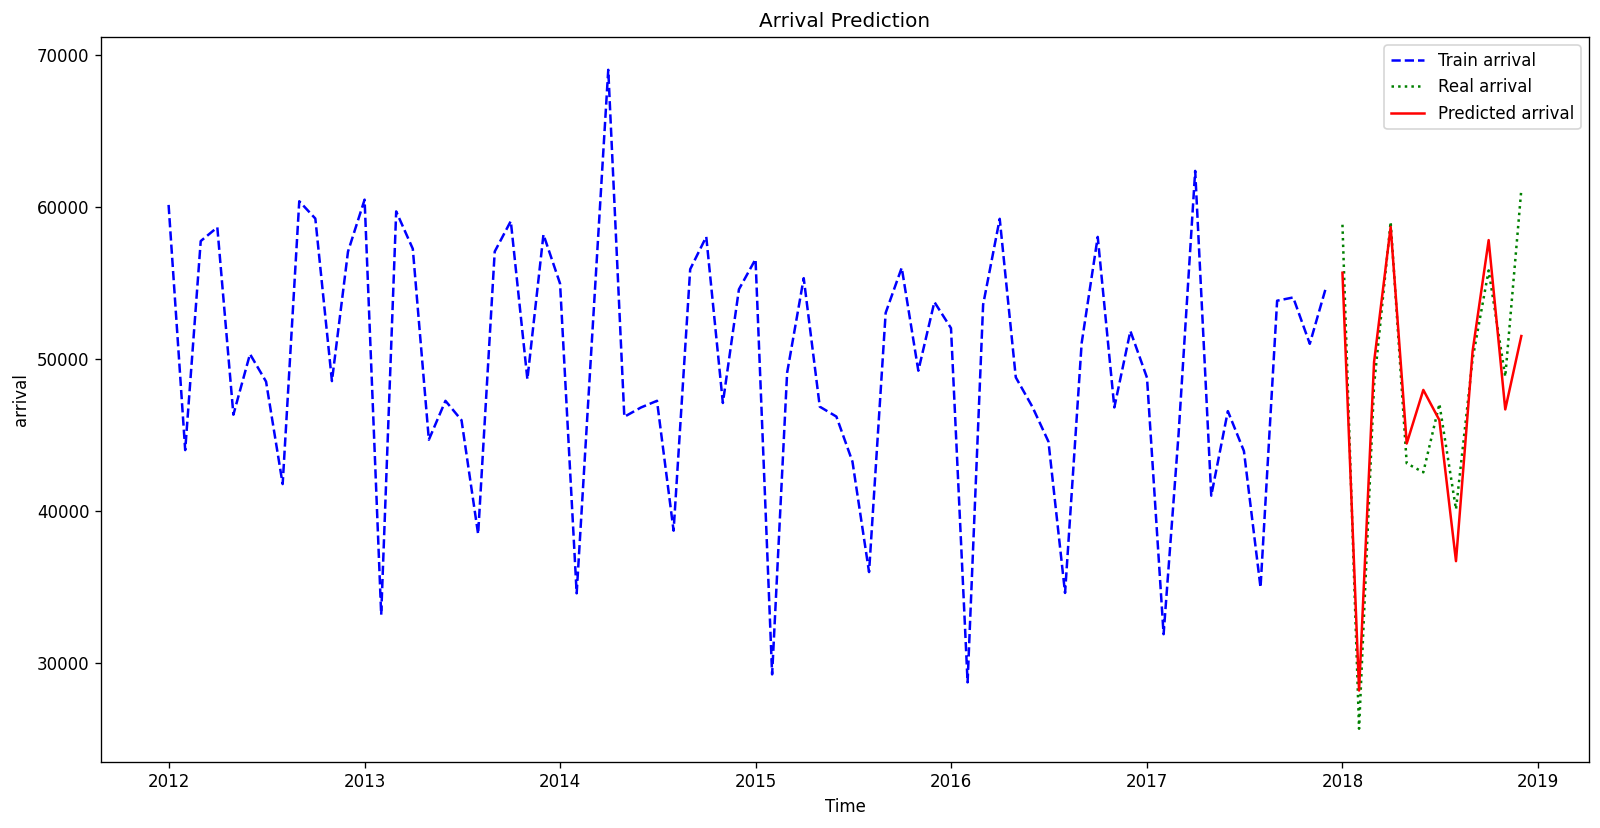

MSE: 13688411.184168816
MAE: 2751.2237955729165
RMSE: 3699.7852889281044


In [ ]:
plt.figure(figsize=(16,8))

plt.plot(train_data.arrival, "--", color='blue', label = 'Train arrival')
plt.plot(test_data.arrival,":", color = 'green', label = 'Real arrival')
plt.plot(test_data.index, y_predicted_finial, color = 'red', label = 'Predicted arrival')
plt.title('Arrival Prediction')
plt.xlabel('Time')
plt.ylabel('arrival')
plt.legend()
plt.show()

mse = mean_squared_error(test_date_true_y, y_predicted_finial)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_date_true_y, y_predicted_finial)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_date_true_y, y_predicted_finial))
print('RMSE: '+str(rmse))

In [ ]:
# The calculated RMSE value was added to the model results
gru_rmse = compute_rmse(test_date_true_y, y_predicted_finial)
result_rmse = disp_rmse(gru_rmse,'GRU_Model')

**Answer 2.2.3:**

In this chapter, we use the Recurrent Neural Network (GRU) model to predict the time series value. The predicted result and RMSE of 3699.7852 are the best.

<a id = "cell_Comparison"></a>
##Comparison of experimental results

In [ ]:
# Displays RMSE results for all models
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  display(result_rmse)

,model_name,RMSE
0,STL_MA,11434.565
1,ARIMA_Model,6432.786
2,Grid_ARIMA_Model,9031.560
3,GRU_Model,3699.785


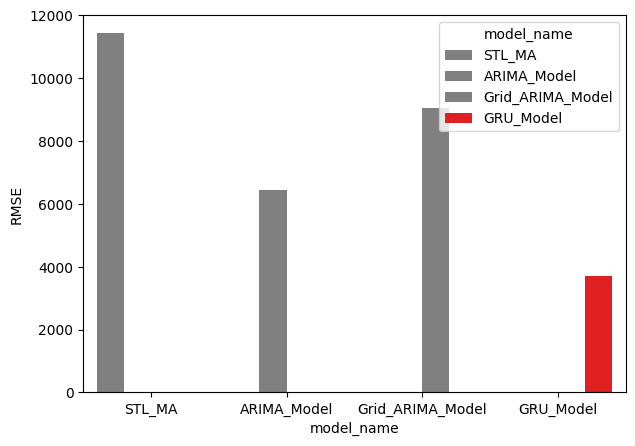

In [ ]:
plt.figure(figsize=(7,5), dpi=100)
clrs = ['red' if (x <= min(result_rmse.RMSE)) else 'grey' for x in result_rmse.RMSE ]

sns.barplot(data=result_rmse, x='model_name', y='RMSE', palette=clrs, hue='model_name',ci=None)
plt.show()

<a id = "cell_Conclusion"></a>
## Conclusion

To predict the number of tourists arriving in Hong Kong, we used the travel data of Hong Kong from 2012 to 2018. We split the data set into training and test data sets. Then three models (STL with moving average, ARIMA, GRU) are used to train the training data set, and the test data set is used to evaluate the model prediction results. Use RMSE as an essential evaluation indicator of model performance. The experiment shows that the RMSE of the GRU model is the lowest at 3699.785 (see the performance comparison chart in the chapter Comparison of experimental results), followed by the RMSE of the ARIMA model is 6432.786. Because the problem 2.2.2 limits the range of the best parameters (1-3), the performance in the parameter search model is poor (RMSE = 9031.560). Finally, the RMSE of the STL with a moving average model is 11434.565, and the moving window of the model is 1, which may be one of the factors affecting the performance.

The main limitation of this report is that the GRU model belongs to the recurrent neural network model, the probability of dropout is adopted to avoid overfitting, so its prediction results are not fixed. In future research,  we can further optimise the ARIMA model to improve the model's performance. Secondly, since there are only 84 sample data, we can be expanded more data to make predictions in future research to ensure the accuracy of the prediction results.